# **pivot** ---> the pivot table take simple column wise as input and groups the intires into a two dimentional table that provides a multidimentional summerization of the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
#tips is a builtin dataset in sns
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
#default aggrigate function is mean
df.pivot_table(index="sex",columns="smoker",values="total_bill",aggfunc="sum").unstack()

smoker  sex   
Yes     Male      1337.07
        Female     593.27
No      Male      1919.75
        Female     977.68
dtype: float64

In [16]:
#all column together
df.pivot_table(index="sex",columns="smoker")["size"]

<ipython-input-16-3c7969e40e46>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index="sex",columns="smoker")["size"]


smoker,Yes,No
sex,,
Male,2.500000,2.711340
Female,2.242424,2.592593


In [26]:
#multidimentional
table=df.pivot_table(index=["sex","smoker"],columns=["day","time"],aggfunc={"size":"mean","tip":"max","total_bill":"sum"},margins=True).stack()
table
#margins means for find total

size                                           tip  \
day                        All       Fri       Sat       Sun      Thur   All   
sex    smoker time                                                             
Male   Yes            2.500000       NaN       NaN       NaN       NaN  10.0   
              Dinner       NaN  2.400000  2.629630  2.600000       NaN   NaN   
              Lunch        NaN  1.666667       NaN       NaN  2.300000   NaN   
       No             2.711340       NaN       NaN       NaN       NaN   9.0   
              Dinner       NaN  2.000000  2.656250  2.883721       NaN   NaN   
              Lunch        NaN       NaN       NaN       NaN  2.500000   NaN   
Female Yes            2.242424       NaN       NaN       NaN       NaN   6.5   
              Dinner       NaN  2.000000  2.200000  2.500000       NaN   NaN   
              Lunch        NaN  2.000000       NaN       NaN  2.428571   NaN   
       No             2.592593       NaN       NaN       NaN       NaN   5.2   
              Dinner       NaN  2.000000  2.307692  3.071429  2.000000   NaN   
              Lunch        NaN  3.000000       NaN       NaN  2.500000   NaN   
All                   2.569672       NaN       NaN       NaN       NaN  10.0   
              Dinner       NaN  2.166667  2.517241  2.842105  2.000000   NaN   
              Lunch        NaN  2.000000       NaN       NaN  2.459016   NaN   

                                             total_bill                   \
day                    Fri    Sat  Sun  Thur        All     Fri      Sat   
sex    smoker time                                                         
Male   Yes             NaN    NaN  NaN   NaN    1337.07     NaN      NaN   
              Dinner  4.73  10.00  6.5   NaN        NaN  129.46   589.62   
              Lunch   2.20    NaN  NaN  5.00        NaN   34.16     0.00   
       No              NaN    NaN  NaN   NaN    1919.75     NaN      NaN   
              Dinner  3.50   9.00  6.0   NaN        NaN   34.95   637.73   
              Lunch    NaN    NaN  NaN  6.70        NaN    0.00     0.00   
Female Yes             NaN    NaN  NaN   NaN     593.27     NaN      NaN   
              Dinner  4.30   6.50  4.0   NaN        NaN   48.80   304.00   
              Lunch   3.48    NaN  NaN  5.00        NaN   39.78     0.00   
       No              NaN    NaN  NaN   NaN     977.68     NaN      NaN   
              Dinner  3.25   4.67  5.2  3.00        NaN   22.75   247.05   
              Lunch   3.00    NaN  NaN  5.17        NaN   15.98     0.00   
All                    NaN    NaN  NaN   NaN    4827.77     NaN      NaN   
              Dinner  4.73  10.00  6.5  3.00        NaN  235.96  1778.40   
              Lunch   3.48    NaN  NaN  6.70        NaN   89.92      NaN   

                                        
day                       Sun     Thur  
sex    smoker time                      
Male   Yes                NaN      NaN  
              Dinner   392.12     0.00  
              Lunch      0.00   191.71  
       No                 NaN      NaN  
              Dinner   877.34     0.00  
              Lunch      0.00   369.73  
Female Yes                NaN      NaN  
              Dinner    66.16     0.00  
              Lunch      0.00   134.53  
       No                 NaN      NaN  
              Dinner   291.54    18.78  
              Lunch      0.00   381.58  
All                       NaN      NaN  
              Dinner  1627.16    18.78  
              Lunch       NaN  1077.55

In [37]:
#plotting graphs
df2=pd.read_csv("expense_data.csv")
type(df2)

pandas.core.frame.DataFrame

In [38]:
df2["Category"].value_counts()

Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: Category, dtype: int64

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [42]:
df2["Date"]=pd.to_datetime(df2["Date"])
df2["Date"]

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
276   2021-11-21 13:30:00
Name: Date, Length: 277, dtype: datetime64[ns]

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [49]:
df2["Month"]=df2["Date"].dt.month_name()
df2["Month"].sort_values(ascending=False)

276    November
250    November
256    November
255    November
254    November
         ...   
198    December
197    December
196    December
195    December
157    December
Name: Month, Length: 277, dtype: object

<Axes: xlabel='Month'>

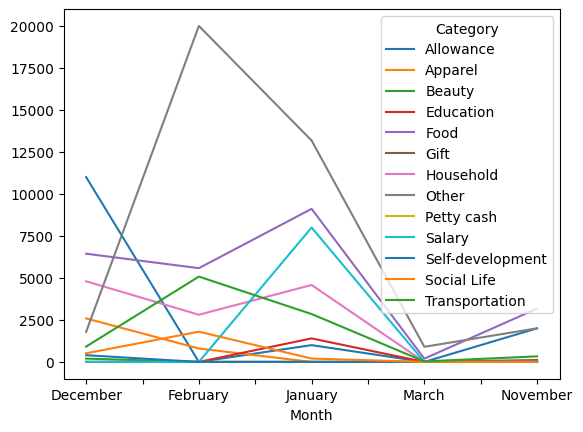

In [55]:
df2.pivot_table(index="Month",columns="Category",values="INR",aggfunc="sum",fill_value=0).plot()